## Understanding Descriptive Statistics

Import the necessary libraries here:

In [84]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import scipy

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [21]:
#dice
dice = [1,2,3,4,5,6]

def dice_10():
    
    dice_rolled = []
    for x in range(10):
        dice_rolled.append(random.choice(dice))
    return dice_rolled
   

In [22]:
dice_list = dice_10()

In [23]:
df = pd.DataFrame(dice_list)

In [24]:
df

,0
0,3
1,6
2,5
3,4
4,6
5,2
6,6
7,3
8,4
9,5


In [25]:
#Rename column
df.rename(columns={0:'dice number'},inplace=True)

In [26]:
df

,dice number
0,3
1,6
2,5
3,4
4,6
5,2
6,6
7,3
8,4
9,5


## Plot the results sorted by value.

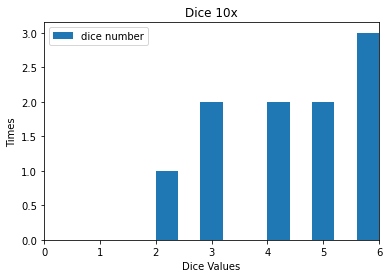

In [31]:
# your code here
df.plot(kind='hist', label='dice')
plt.plot()
plt.title('Dice 10x')
plt.xlabel('Dice Values')
plt.ylabel('Times')
plt.xlim(0,6)

plt.legend()
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [32]:
from collections import Counter

In [33]:
# your code here
# frequency distribution calculation

dice_list2 = Counter(dice_list)

In [34]:
dice_list2

Counter({3: 2, 6: 3, 5: 2, 4: 2, 2: 1})

In [35]:
df2 = pd.DataFrame.from_dict(dice_list2, orient='index')

In [36]:
df2.rename(columns={0:'dice values'},inplace=True)
df2

,dice values
3,2
6,3
5,2
4,2
2,1


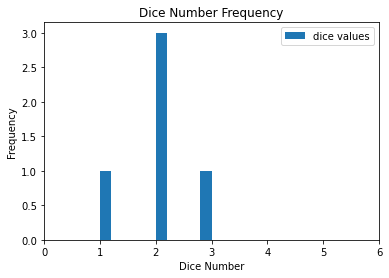

In [37]:
df2.plot(kind='hist')
plt.plot()
plt.title('Dice Number Frequency')
plt.ylabel('Frequency')
plt.xlabel('Dice Number')
plt.xlim(0,6)

plt.legend()
plt.show()

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here

def mean_function(number):
    sum_observations = 0
    for observation in number:
        sum_observations = sum_observations + observation
        
    mean_observations = sum_observations/len(number)
    return mean_observations
    
    

In [28]:
mean_function([5,5])

5.0

## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [83]:
dice_list2

Counter({3: 2, 5: 3, 1: 1, 4: 2, 2: 1, 6: 1})

In [82]:
# your code here
mean_function(dice_list2)

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [85]:
# your code here
def median_function(number):
    number.sort() #organize the number in ascending order
    median = len(number) // 2 #floor division
    
    return (number[median] + number[~ median]) / 2 #number[~median]: count from the end to the beginning
    

In [96]:
median_function([2,1,3,4,5])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [5]:
# your code here



## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [12]:
# your code here
data = pd.read_csv('roll_the_dice_hundred.csv')

In [13]:
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [38]:
data.shape

(100, 3)

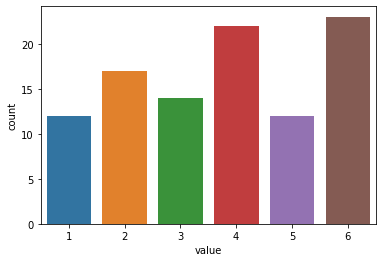

In [20]:
sns.countplot(data.sort_values(by="value")["value"])

In [0]:
"""
your comments here
After 20 counts, higher frequency of values 4 and 6
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [41]:
# your code here
mean_function([data])

,Unnamed: 0,roll,value
0,0.0,0.0,1.0
1,1.0,1.0,2.0
2,2.0,2.0,6.0
3,3.0,3.0,1.0
4,4.0,4.0,6.0
...,...,...,...
95,95.0,95.0,4.0
96,96.0,96.0,6.0
97,97.0,97.0,1.0
98,98.0,98.0,3.0


#### 3.- Now, calculate the frequency distribution.


In [42]:
# your code here
data_frequency = Counter(data)

In [43]:
data_frequency

Counter({'Unnamed: 0': 1, 'roll': 1, 'value': 1})

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

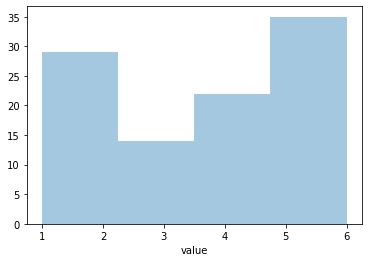

In [53]:
# your code here
sns.distplot(data['value'], hist=True, kde=False)

In [0]:
"""
your comments here

It's a barplot and not a histogram. 
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [54]:
# your code here
data_thousand = pd.read_csv('roll_the_dice_thousand.csv')

In [55]:
data_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


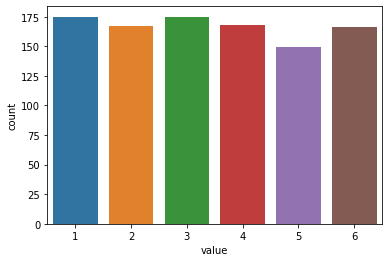

In [57]:
sns.countplot(data_thousand.sort_values(by="value")["value"])

In [0]:
"""
your comments here

The distribution is better distributed.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [59]:
# your code here
data_ages = pd.read_csv('ages_population.csv')
data_ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [66]:
data_ages.shape

(1000, 1)

In [61]:
#frequency distribution calculation

data_ages_freq = Counter(data_ages)
data_ages_freq

Counter({'observation': 1})

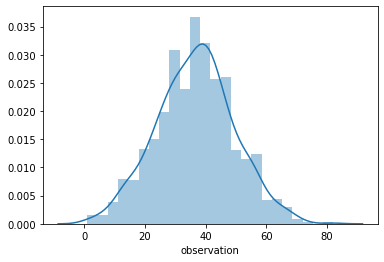

In [65]:
#frequency distribution plot
sns.distplot(data_ages['observation'], hist=True, kde=True)

#mean = 40 and std = 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [68]:
# your code here
data_ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [0]:
"""
your comments here


"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [70]:
# your code here
data_population = pd.read_csv('ages_population2.csv')
data_population.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


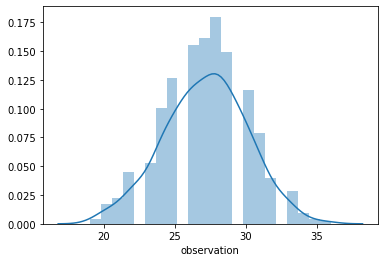

In [71]:
sns.distplot(data_population['observation'], hist=True, kde=True)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [0]:
"""
your comments here

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [72]:
# your code here
data_population.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [0]:
"""
your comments here

Mean and std decreased
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [73]:
# your code here
data_population3 = pd.read_csv('ages_population3.csv')
data_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


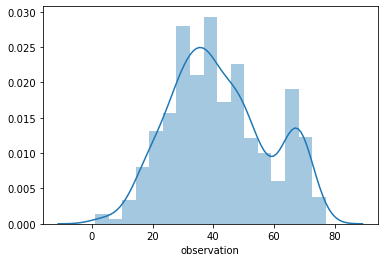

In [75]:
sns.distplot(data_population3['observation'], hist=True, kde=True)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [76]:
# your code here
data_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [0]:
"""
your comments here

Mean and std increased in comparison of last data
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [83]:
# your code here
data_population3.quantile([0.25, 0.5, 0.75,1])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [0]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [86]:
# your code here
data_population3.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,observation
0.0,1.0
0.1,22.0
0.2,28.0
0.3,32.0
0.4,36.0
0.5,40.0
0.6,45.0
0.7,50.0
0.8,57.0
0.9,67.0


In [0]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [85]:
# your code here
scipy.stats.kruskal(data_ages, data_population, data_population3)

KruskalResult(statistic=697.0874498544146, pvalue=4.259744610458989e-152)

In [0]:
"""
your comments here

The Kruskal-Wallis H-test tests the null hypothesis that the population
median of all of the groups are equal.

"""